# Week14b

### 오토인코더

Epoch 1/10
3125/3125 [==============================] - 90s 29ms/step - loss: 0.0070 - acc: 0.6950 - val_loss: 0.0043 - val_acc: 0.7742
Epoch 2/10
3125/3125 [==============================] - 83s 26ms/step - loss: 0.0040 - acc: 0.7870 - val_loss: 0.0037 - val_acc: 0.8020
Epoch 3/10
3125/3125 [==============================] - 84s 27ms/step - loss: 0.0035 - acc: 0.7994 - val_loss: 0.0033 - val_acc: 0.8033
Epoch 4/10
3125/3125 [==============================] - 84s 27ms/step - loss: 0.0033 - acc: 0.8047 - val_loss: 0.0032 - val_acc: 0.8163
Epoch 5/10
3125/3125 [==============================] - 84s 27ms/step - loss: 0.0031 - acc: 0.8073 - val_loss: 0.0030 - val_acc: 0.7967
Epoch 6/10
3125/3125 [==============================] - 88s 28ms/step - loss: 0.0030 - acc: 0.8098 - val_loss: 0.0030 - val_acc: 0.7902
Epoch 7/10
3125/3125 [==============================] - 87s 28ms/step - loss: 0.0029 - acc: 0.8121 - val_loss: 0.0028 - val_acc: 0.8146
Epoch 8/10
3125/3125 [==========================

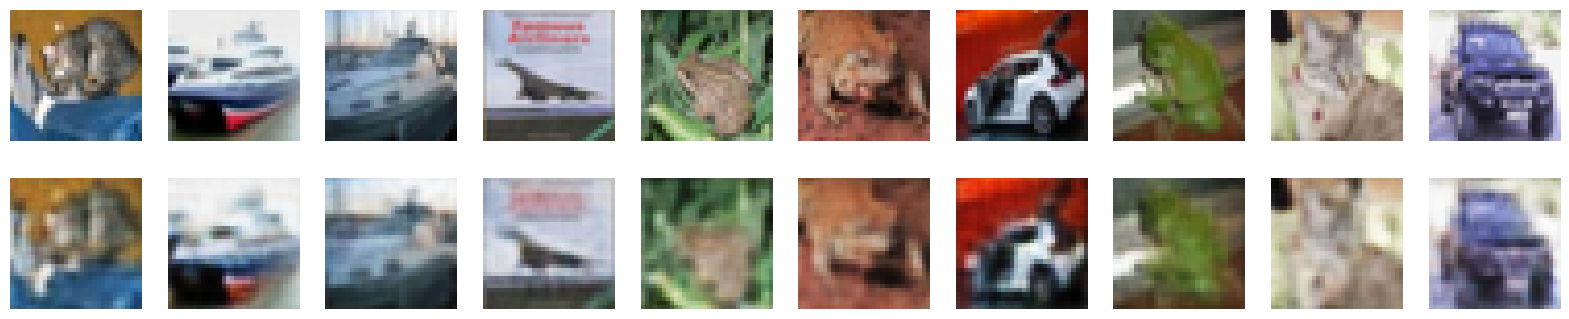

In [3]:
from keras import layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

encoder = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
])
decoder = models.Sequential([
    layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=(2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2)),
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse',metrics=['acc'])
autoencoder.fit(x_train, x_train,epochs=10,batch_size=16,
    validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

def plot_images(original, decoded, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        plt.axis('off')
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded[i])
        plt.axis('off')

plot_images(x_test, decoded_imgs)

print(encoder.summary())
print(decoder.summary())
print(encoded_imgs.shape)
print(decoded_imgs.shape)

### DBSCAN실습 Task 1 두 개의 반달 모양의 데이터 셋 Clustering

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


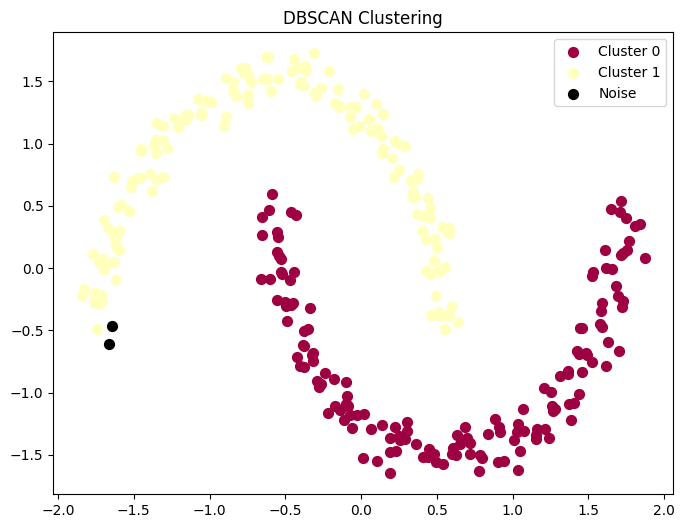

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42) # 반달 모양 데이터 생성

scaler = StandardScaler() # 데이터 정규화
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2, min_samples=5) # eps : min_samples : 클러스터를 형성하기 위해 최소 5개의 데이터를 필요
labels = dbscan.fit_predict(X_scaled)

unique_labels = set(labels) # labels에 있는 값들 추출 (-1(이상치),0(0번 클래스),1(1전 클래스)) 
colors = [plt.cm.Spectral (each) for each in np.linspace(0, 1, len(unique_labels))] # 각 label 별 색깔 지정 0 - 빨강, 1 - 노랑
print(colors)
plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:#이상치는 검정색으로 지정
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f"Cluster {k}" if k != -1 else "Noise", s=50)

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

### DBSCAN실습 Task 2 특정 지역의 날씨 정보 Clustering

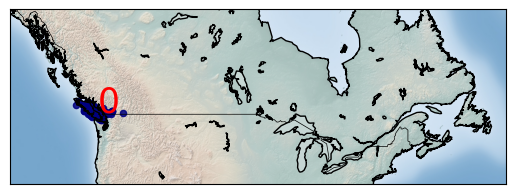

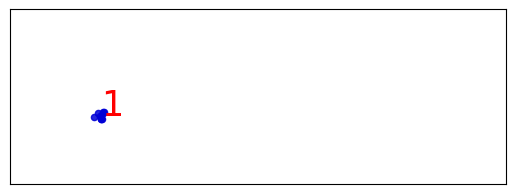

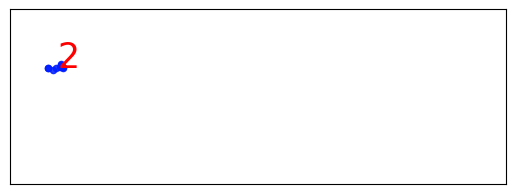

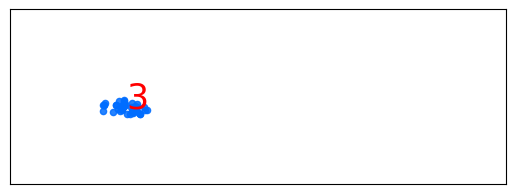

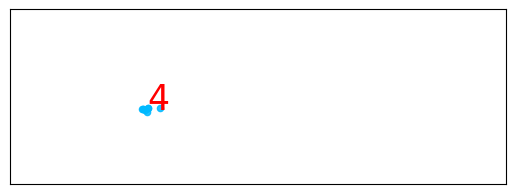

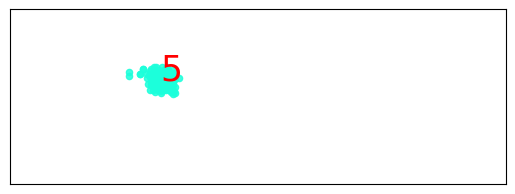

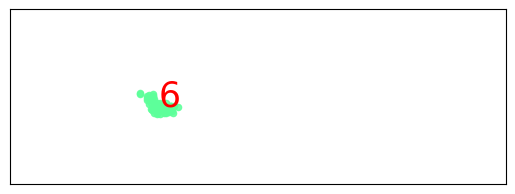

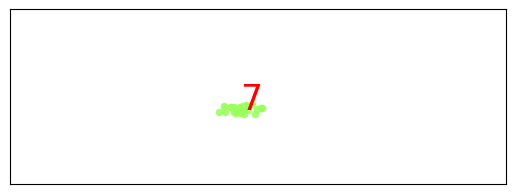

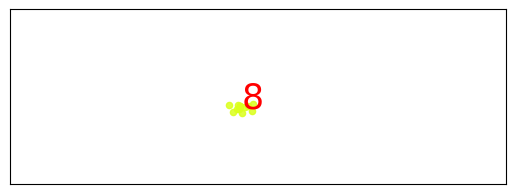

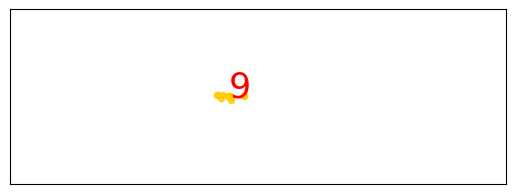

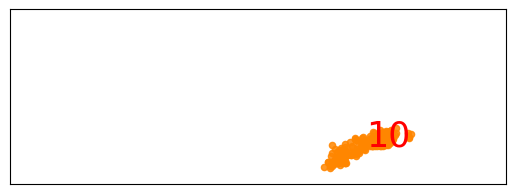

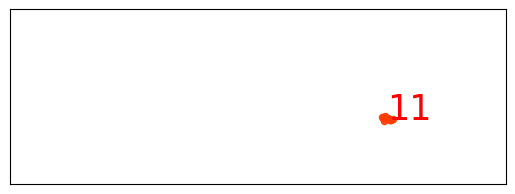

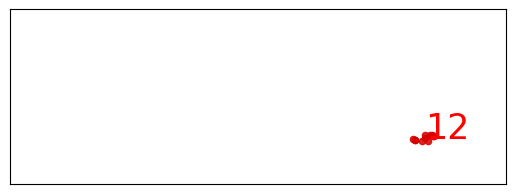

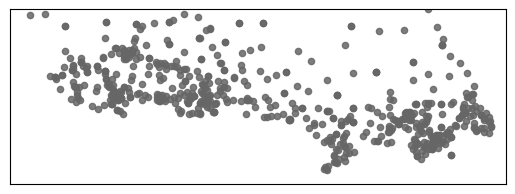

In [9]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

file = r'./weather-stations20140101-20141231.csv'
pdf = pd.read_csv(file)
pdf.head(5)

#데이터 필터링 : 지도에서 long(검도) -140~40, lat(위도) -50~60 사이로 데이터 필터링
llon=-140; llat = 40; ulon=-50; ulat = 60
pdf = pdf[(pdf['Long']> llon) & (pdf['Long'] < ulon) & (pdf[ 'Lat'] > llat) & (pdf['Lat'] < ulat)]

#지도를 그리는 라이브러리(Basemap)
my_map = Basemap(projection='merc',
                resolution='l', area_thresh=1000.0,
                llcrnrlon = llon, llcrnrlat = llat, # min longitude, min latitude
                urcrnrlon = ulon, urcrnrlat = ulat) # max longitude, max latitude
my_map.drawcoastlines() # 해안선 그림
my_map.drawcountries () # 국가 경계 그림
my_map.fillcontinents (color='white', alpha=0.3) # 대륙을 흰색으로 채움
my_map.shadedrelief() # 지형의 음영 추가

a = np.asarray(pdf.Long) # csv 파일에서 맑은 Long
b =np.asarray(pdf.Lat)

xs, ys = my_map(a,b) # Basemap을 이용해서 지도 좌표로 변환된 xy 값 
#csv 파일 맨끝에 xmym 추가
pdf.loc[:,'xm'] = xs
pdf.loc[:,'ym'] = ys

#clustering 데이터
Clus_dataset = pdf[['xm','ym', 'Tm']]
Clus_dataset = np.nan_to_num(Clus_dataset) # 결측치는 0으로 대체
Clus_dataset = StandardScaler().fit_transform(Clus_dataset) # 정규화

db = DBSCAN(eps=0.15, min_samples=10)#eps: min_samples: 클러스터를 형성하기 위해 최소 10개의 데이터 필요
db.fit(Clus_dataset)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # Labels 개수만큼 배열 만들어 False로 초기화
core_samples_mask[db.core_sample_indices_] = True # 코어 포인트라고 판단되는 포인트만 배열에서 True로 설정

labels = db.labels_
pdf.loc[:, 'Clus_Db'] = labels# csv파일에 Clus_Db열 추가하여 labels 추가
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0) # 노이즈(-1) 제거
clusterNum = len(set(labels)) # 14

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum)) # 14개에 색상 지정

# visulalization
for clust_number in set(labels):
    c = (([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int64(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color = c, s = 20, alpha = 0.85)
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx,ceny, str(clust_number), fontsize=25, color='red')
        plt.show()